# Lab-6.1: ARM (Bonus)

**Author**: Brian Kwon

`THIS IS AN OPTIONAL (NOT MANDATORY) BONUS ASSIGNMENT FOR UP TO +7.5 BONUS POINTS` 

In this lab we will use sentiment analysis in association rule learning to analyze a novel (Dracula)


**Instructions** 

* Read and work through all tutorial content and do all exercises below
  
**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

---
format: 
    html: 
        embed-resources: true
---

## Import 

In [1]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx 


## 6.1.1: Read and clean novel

* The following code is needed to read, clean, and convert the novel into a format suitable for ARM 
* Various chunks of code are missing, your job is to complete them based on the comments 


In [2]:
#USER PARAM
input_path			=	'DRACULA.txt'
compute_sentiment 	=	True		
sentiment    		=	[]			#average sentiment of each chunck of text 
ave_window_size		=	250			#size of scanning window for moving average
					

#OUTPUT FILE
output='transactions.txt'
if os.path.exists(output): os.remove(output)

#INITIALIZE
lemmatizer 	= 	WordNetLemmatizer()
ps 			=	PorterStemmer()
sia 		= 	SentimentIntensityAnalyzer()

#ADD MORE
stopwords	=	stopwords.words('english')
add=['mr','mrs','wa','dr','said','back','could','one','looked','like','know','around','dont']
for sp in add: stopwords.append(sp)

def read_and_clean(path,START=0,STOP=-1):
	global sentiment 

	#-----------------------
	#INSERT CODE TO READ IN AS ONE BIG STING
	#-----------------------
	
	with open(path, 'r', encoding='utf-8') as file: text = file.read()

	
	#REMOVE HEADER, AND NEW LINES
	text=text.replace("'",'') #wasn't --> wasnt
	lines = text.splitlines(); text=''; 
	lines=lines[START:STOP]    # mystring.replace('\n', ' ')
	for line in lines: text=text+' '+line

	#-----------------------
	#INSERT CODE TO ONLY KEEP CHAR IN string.printable
	#-----------------------
	text = ''.join(filter(lambda x: x in string.printable, text))	
 
	#BREAK INTO CHUNKS (SENTANCES OR OTHERWISE)
	sentences=nltk.tokenize.sent_tokenize(text)  #SENTENCES

	print("NUMBER OF SENTENCES FOUND:",len(sentences)); #print(sentences)

	#CLEAN AND LEMMATIZE
	keep='0123456789abcdefghijklmnopqrstuvwxy'

	new_sentences=[]; vocabulary=[]
	for sentence in sentences:
		new_sentence=''

		# REBUILD LEMITIZED SENTENCE
		for word in sentence.split():
			
			#ONLY KEEP CHAR IN "keep"
			tmp2=''
			for char in word: 
				if(char in keep): 
					tmp2=tmp2+char
				else:
					tmp2=tmp2+' '
			word=tmp2

			#-----------------------
			# INSERT CODE TO LEMMATIZE THE WORDS
			#-----------------------

			new_word = lemmatizer.lemmatize(word)
   
			#REMOVE WHITE SPACES
			new_word=new_word.replace(' ', '')

			#BUILD NEW SENTANCE BACK UP
			if( new_word not in stopwords):
				if(new_sentence==''):
					new_sentence=new_word
				else:
					new_sentence=new_sentence+','+new_word
				if(new_word not in vocabulary): vocabulary.append(new_word)

		#SAVE (LIST OF LISTS)		
		new_sentences.append(new_sentence.split(","))
		
		#SIA
		if(compute_sentiment):
			#-----------------------
			# INSERT CODE TO USE NLTK TO DO SENTIMENT ANALYSIS 
			#-----------------------
			sentiment.append(list(sia.polarity_scores(sentence).values()))
  
		#SAVE SENTANCE TO OUTPUT FILE
		if(len(new_sentence.split(','))>2):
			f = open(output, "a")
			f.write(new_sentence+"\n")
			f.close()

	sentiment=np.array(sentiment)
	print("TOTAL AVERAGE SENTEMENT:",np.mean(sentiment,axis=0))
	print("VOCAB LENGTH",len(vocabulary))
	return new_sentences

transactions=read_and_clean(input_path,400,-400)
print(transactions[0:5])


NUMBER OF SENTENCES FOUND: 8322
TOTAL AVERAGE SENTEMENT: [0.07608435 0.83015129 0.09376628 0.04428464]
VOCAB LENGTH 10097
[['grim', 'fancy', 'engendered', 'earlier', 'evening', 'falling', 'sunset', 'threw', 'strange', 'relief', 'ghostlike', 'cloud', 'amongst', 'arpathians', 'seem', 'wind', 'ceaselessly', 'valleys'], ['ometimes', 'hill', 'steep', 'despite', 'driver', 'haste', 'horse', 'go', 'slowly'], ['wished', 'get', 'walk', 'home', 'driver', 'would', 'hear'], ['must', 'walk', 'dog', 'fierce', 'added', 'evidently', 'meant', 'grim', 'pleasantryfor', 'round', 'catch', 'approving', 'smile', 'restand', 'may', 'enough', 'matter', 'go', 'sleep'], ['stop', 'would', 'make', 'moment', 'pause', 'light', 'lamps']]


## 6.1.2: Visualize sentiment 

In [ ]:
pos = y[:,2]
p_avg = np.convolve(pos, np.ones(w) / w, mode='valid')

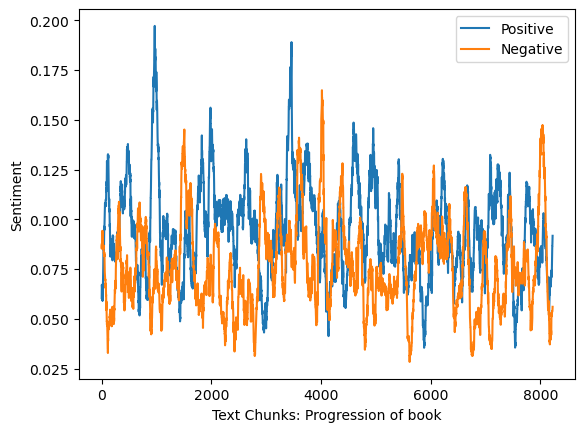

In [7]:
def moving_ave(y,w=100):
	#-----------------------
	# INSERT CODE TO COMPUTE THE MOVING AVERAGE OF A SIGNAL Y
	#-----------------------
	neg = y[:,0]
	pos = y[:,2]
	p_avg = np.convolve(pos, np.ones(w) / w, mode='valid')
	n_avg = np.convolve(neg, np.ones(w) / w, mode='valid')
	return [p_avg,n_avg]

# INSERT CODE TO VISUALIZE THE SENTIMENT ANALYSIS AS A TIME-SERIES (SEE PLOT FOR AN EXAMPLE)
p,n = moving_ave(sentiment)
plt.plot(p,label="Positive")
plt.plot(n,label="Negative")
plt.xlabel("Text Chunks: Progression of book")
plt.ylabel("Sentiment")
plt.legend()
plt.show()

## Lab-6.1.3: Re-format output

In [8]:
# INSERT CODE TO RE-FORMAT THE APRIORI OUTPUT INTO A PANDAS DATA-FRAME WITH COLUMNS "rhs","lhs","supp","conf","supp x conf","lift"

def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        # print("=====================================")
        # print(results[i])
        # print(len(list(results[i])))
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

## Utility function: Convert to NetworkX object

In [9]:
def convert_to_network(df):
    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G


## Utility function: Plot NetworkX object

In [10]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Dracula')
    plt.show()

# raise

## 6.1.4: Train ARM model 

In [11]:
# INSERT CODE TO TRAIN THE ARM MODEL USING THE "apriori" PACKAGE
print("Transactions:",pd.DataFrame(transactions))
results = list(apriori(transactions, min_support=0.005, min_confidence=0.0, min_lift=0, min_length=2))
# results = list(apriori(transactions, min_support=0.01, min_confidence=0.0, min_lift=0, min_length=2))
pd_results=reformat_results(results)
G = convert_to_network(pd_results)

Transactions:             0       1           2         3         4          5        6   \
0         grim   fancy  engendered   earlier   evening    falling   sunset   
1     ometimes    hill       steep   despite    driver      haste    horse   
2       wished     get        walk      home    driver      would     hear   
3         must    walk         dog    fierce     added  evidently    meant   
4         stop   would        make    moment     pause      light    lamps   
...        ...     ...         ...       ...       ...        ...      ...   
8317      book    sure    wantsome  possibly    always     wanted     None   
8318  selected    list       every      book        ha   achieved  certain   
8319    rosset               unlap      list  greatest       ndex      ood   
8320       pay     ook        ther       ide    rapper          n     case   
8321        sk  rosset                unlaps      list                       

           7              8           9   ...    

## Lab-6.1.5: Visualize the results

            rhs         lhs      supp      conf  supp x conf       lift
0            []     [asked]  0.006609  0.022965     0.000152   1.394968
1       [asked]          []  0.006609  0.401460     0.002653   1.394968
2            []      [away]  0.006849  0.023800     0.000163   1.082296
3        [away]          []  0.006849  0.311475     0.002133   1.082296
4            []      [came]  0.014179  0.049269     0.000699   1.371302
..          ...         ...       ...       ...          ...        ...
211         [r]     [eward]  0.007090  0.239837     0.001700  25.264897
212    [friend]       [ohn]  0.005888  0.284884     0.001677  32.927810
213       [ohn]    [friend]  0.005888  0.680556     0.004007  32.927810
214  [odalming]       [ord]  0.007330  0.734940     0.005387  83.783133
215       [ord]  [odalming]  0.007330  0.835616     0.006125  83.783133

[216 rows x 6 columns]


/var/folders/qd/2fpgzg4s3vzc43qj0fq464wr0000gn/T/ipykernel_52777/3607068954.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues')


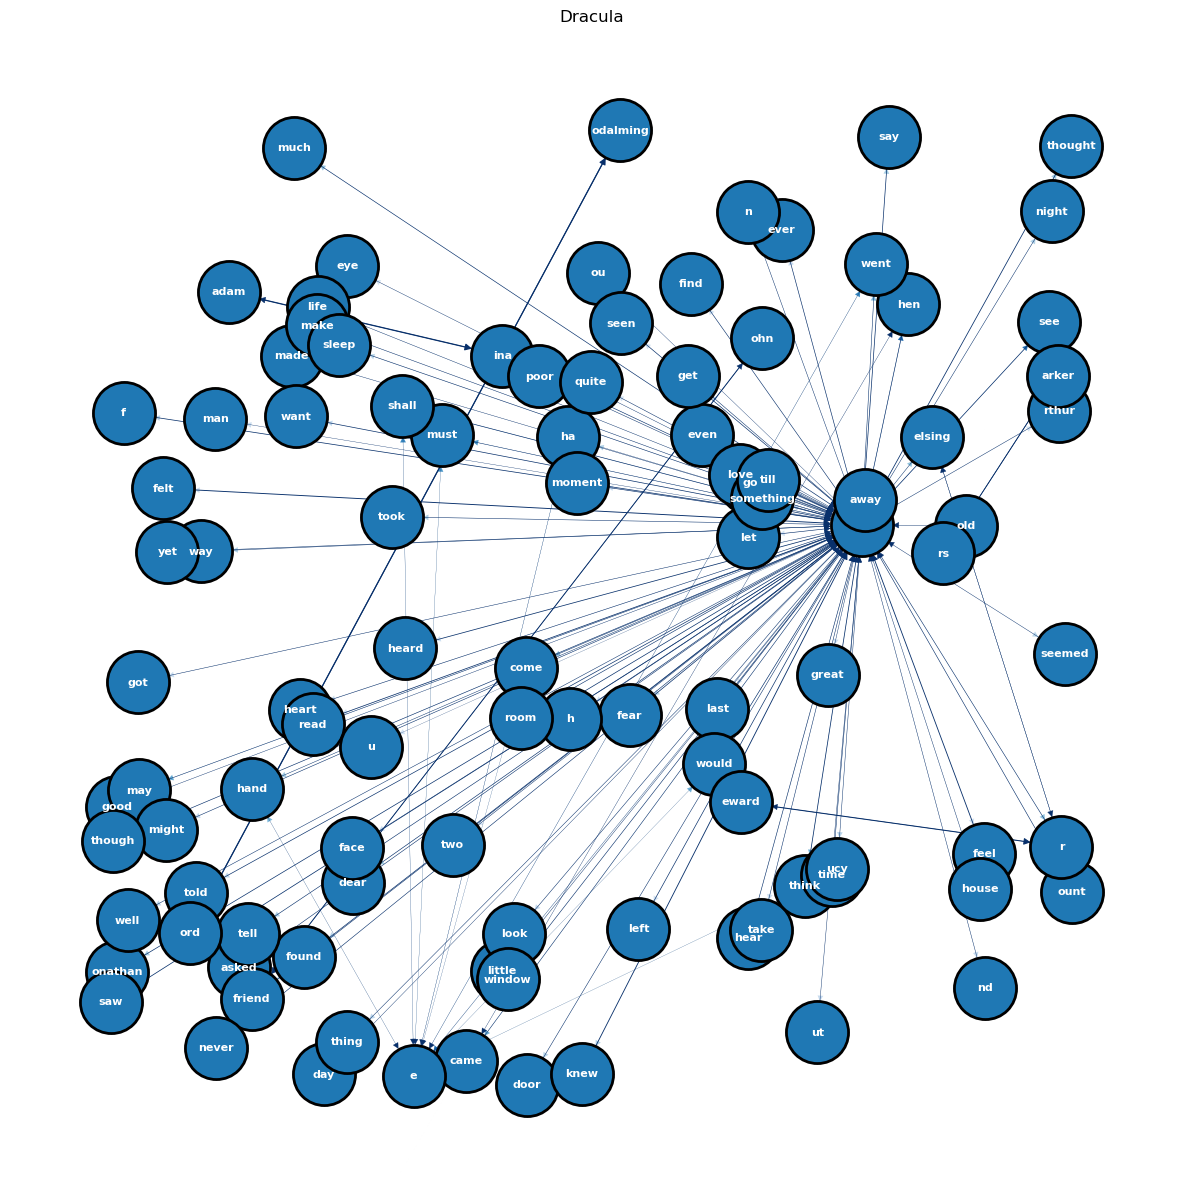

In [12]:
# INSERT CODE TO PLOT THE RESULTS AS A NETWORK-X OBJECT 
print(pd_results)
plot_network(G)